### Step 1. Reading and Understanding of data


In [620]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [621]:
# reading data
df = pd.read_csv('files/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [622]:
# checking the shape
df.shape

(730, 16)

In [623]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [624]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 we can see that there are no null values

In [625]:
# describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [626]:
# renaming few columns for better readability
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace = True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping unwanted columns

'instant' just has record index for every row, so we can remove it.

'dteday' can be removed as we already have 'month' and 'year'.

'casual' and 'registered' can be removed as we have 'cnt' varible which tells about both of them.

In [627]:
df.drop(columns={'instant','dteday','casual','registered'}, inplace = True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2. Visualizing the Data for Modelling

In [628]:
# Encoding the season column
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [629]:
# Encoding the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.month.head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: month, dtype: object

In [630]:
# Encoding the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weekday.head()

0    sat
1    sun
2    mon
3    tue
4    wed
Name: weekday, dtype: object

In [631]:
# Encoding the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})
df.weathersit.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [632]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


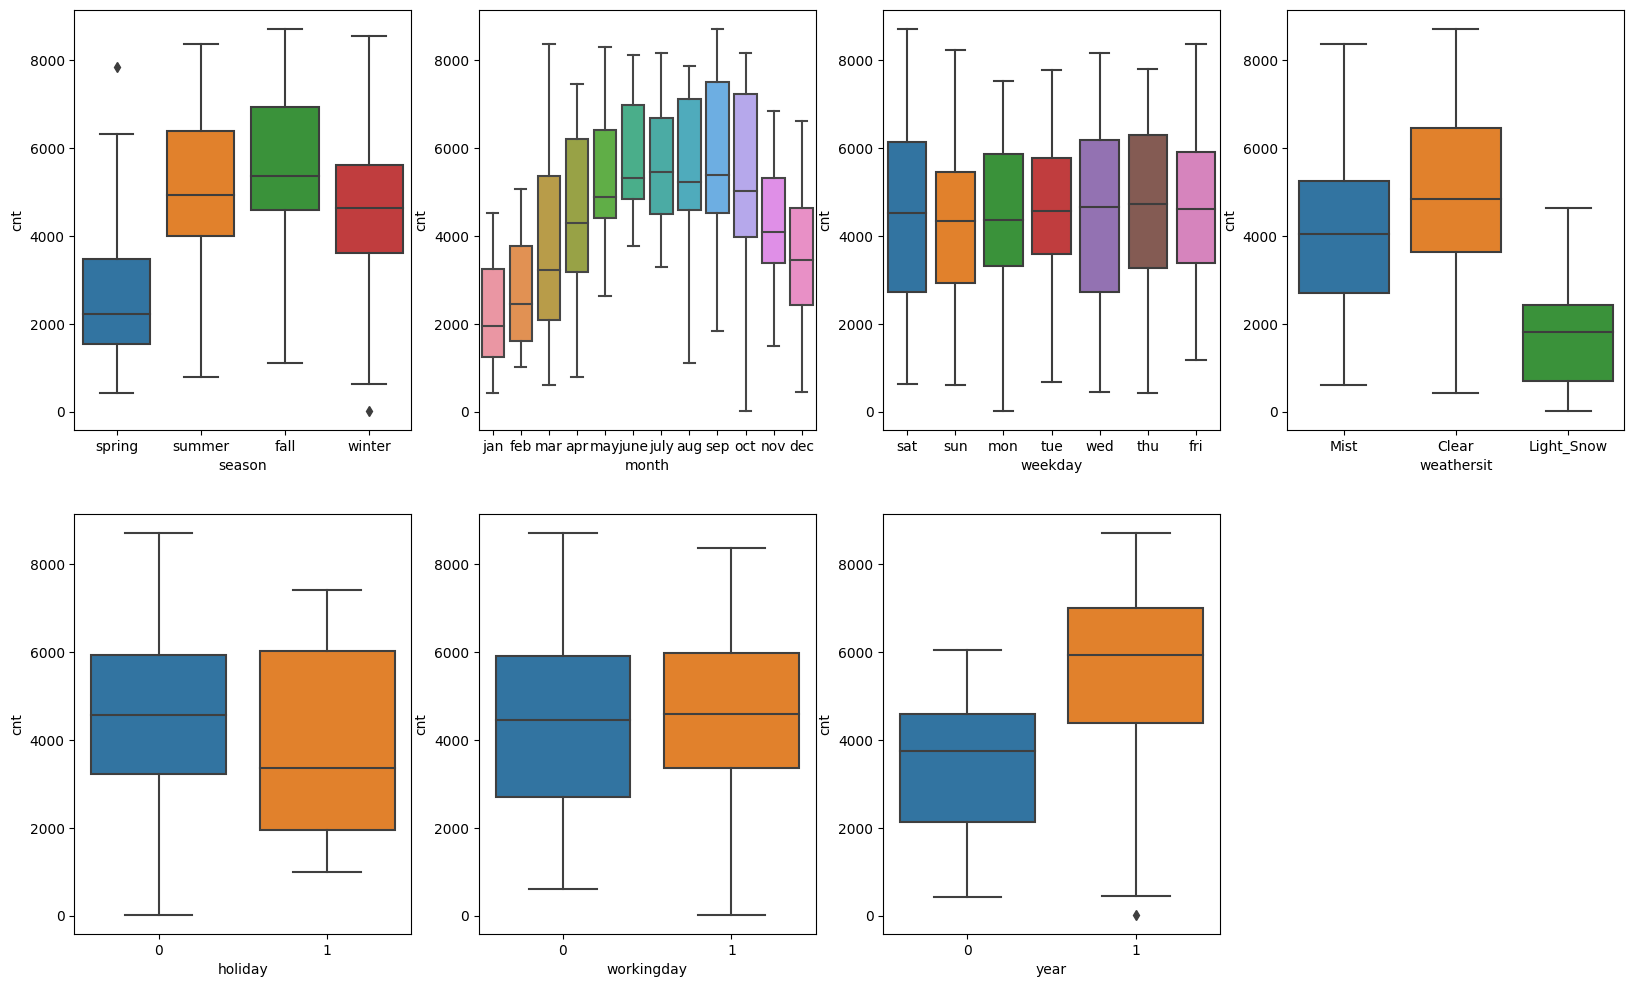

In [633]:
# visualization categorical variables
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='month',y='cnt',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='year',y='cnt',data=df)
plt.show()


From here we can see that there are no outlier values to be handled

And insights that we can draw are:

1.Fall has highest demand for rental bikes

2.Demand for next year has grown

3.Weekday is not clear for any insight

4.Demand is higher in september, and demand is growing continously from jan to jun

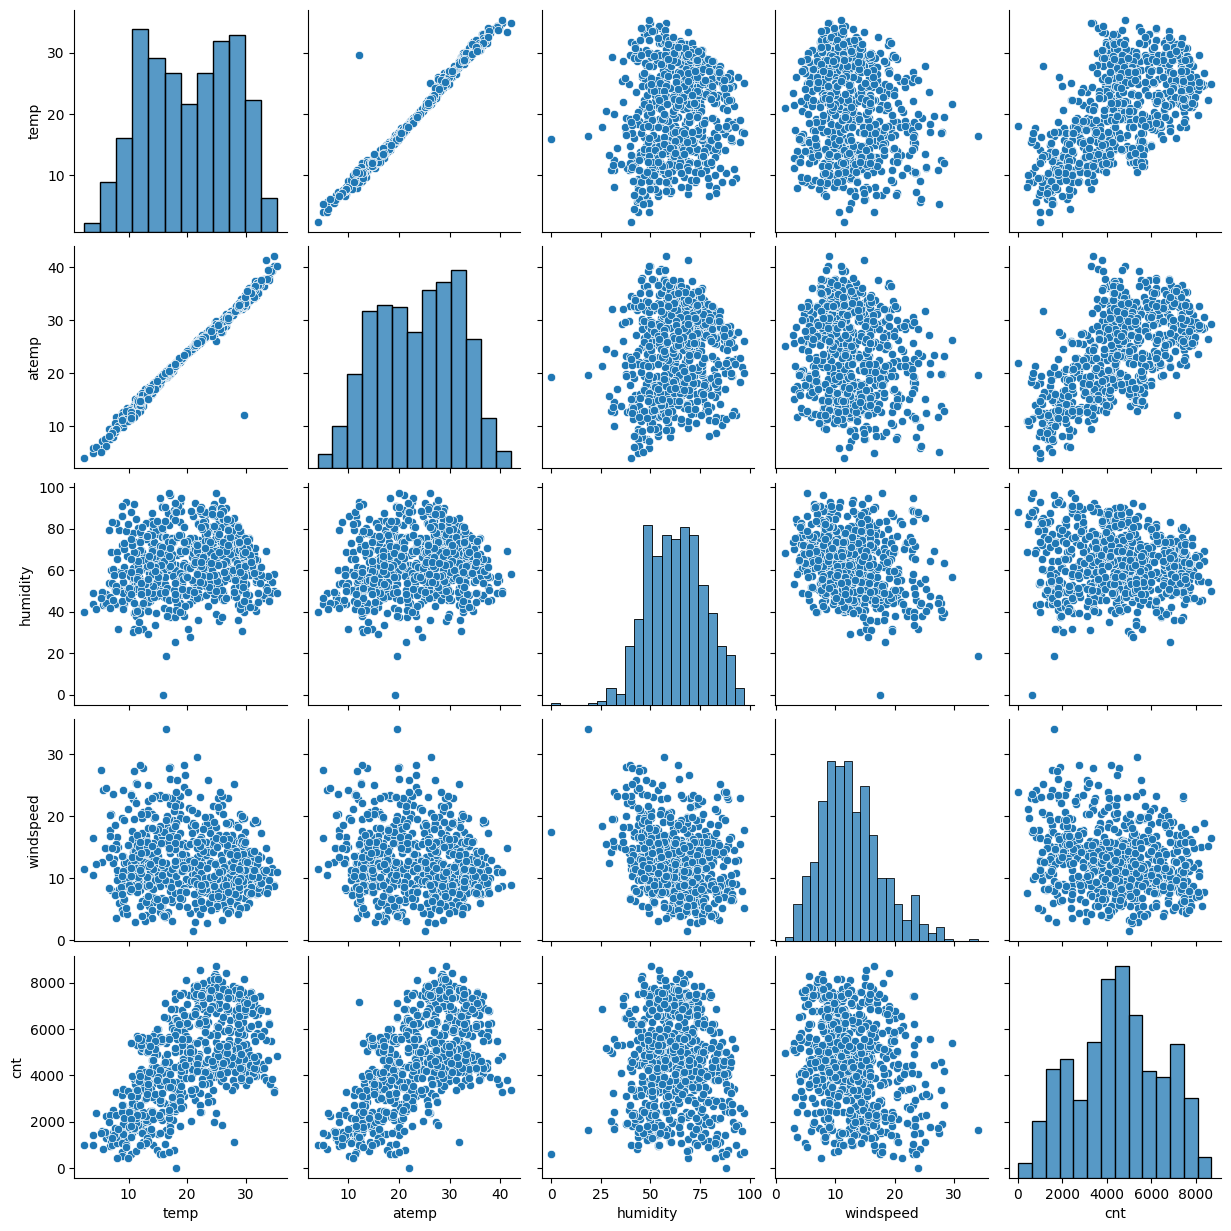

In [634]:
# visualising numerical varibales
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

Looks like 'temp' and 'atemp' has the highest correlation with the target variable.

And also 'temp' and 'atemp' are highly correlated with each other.

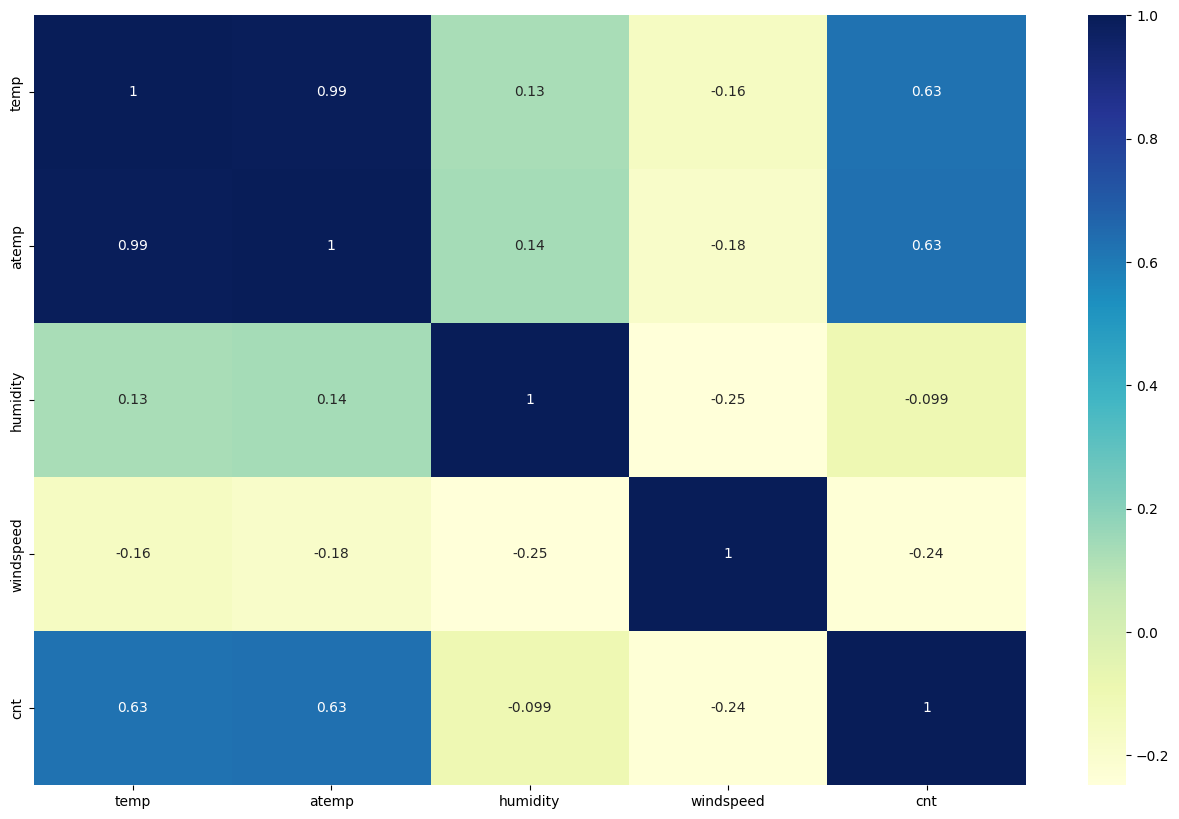

In [635]:
# Heat map
plt.figure(figsize = (16,10))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot=True, cmap='YlGnBu')
plt.show()

Here we can see that atemp and temp has high correlation like 0.99

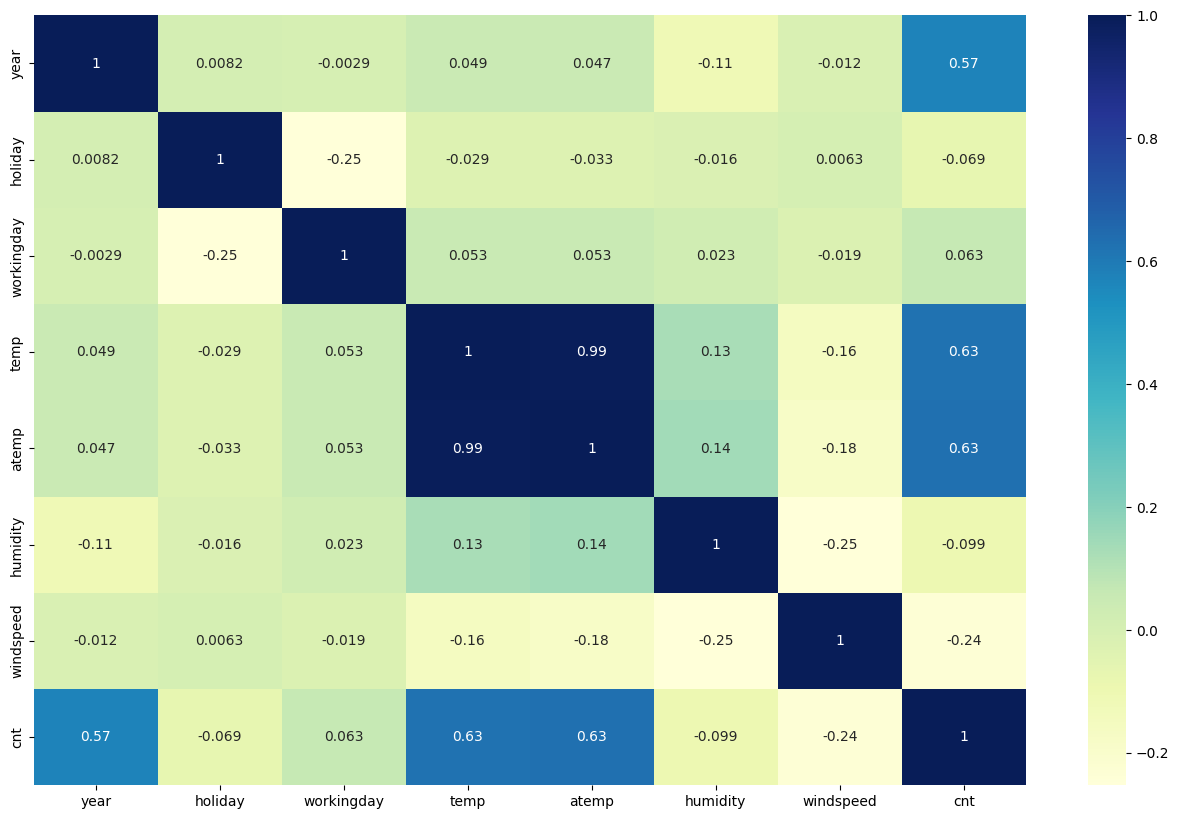

In [636]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

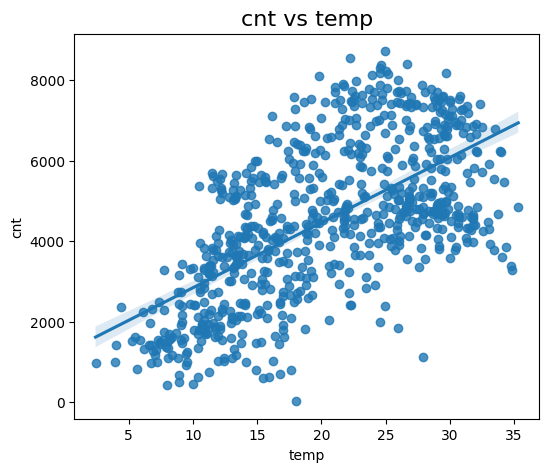

In [637]:
plt.figure(figsize = (6,5))
plt.title("cnt vs temp", fontsize = 16)
sns.regplot(data=df, y='cnt', x='temp')
plt.show()

We can see that 'cnt' is linearly increasing with temp indicating linear relationship

Demand for bikes is positively correlated to temp

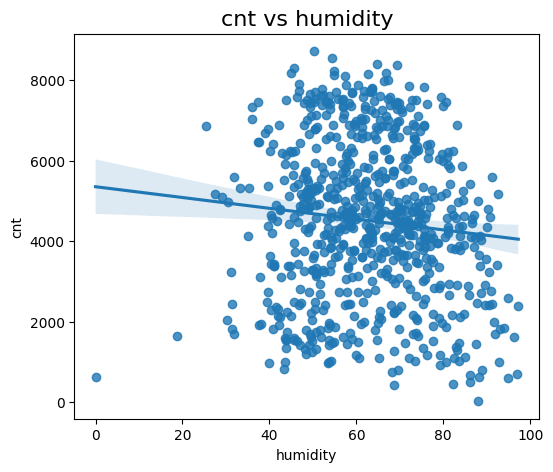

In [638]:
plt.figure(figsize = (6,5))
plt.title("cnt vs humidity", fontsize = 16)
sns.regplot(data=df, y='cnt', x='humidity')
plt.show()

We can see that 'cnt' is decreasing with increasing 'humidity'

And values are more scattered around

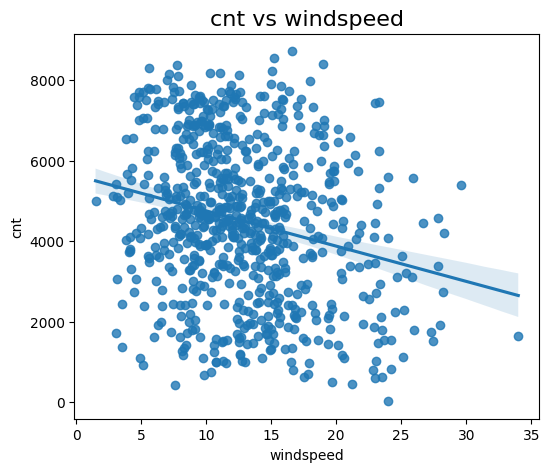

In [639]:
plt.figure(figsize = (6,5))
plt.title("cnt vs windspeed", fontsize = 16)
sns.regplot(data=df, y='cnt', x='windspeed')
plt.show()

We can see that 'cnt' is decreasing with increasing 'humidity'

Windspeed values are more scattered around

### step 3 Data Preparation Linear Regression

In [640]:
# Dummy variable creation for month, weekday, weathersit and season variables
months_df = pd.get_dummies(df.month, drop_first=True)
weekday_df = pd.get_dummies(df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)
season_df = pd.get_dummies(df.season, drop_first=True)


In [641]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [642]:
# Merging  the dataframe, with the dummy variable dataset.
df_new = pd.concat([df, months_df,weekday_df,weathersit_df,season_df],axis = 1)
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [643]:
df_new.shape

(730, 34)

In [644]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [645]:
df_new.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [646]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [647]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


### step 4 : Splitting the Data into Training and Testing sets

In [648]:
# splitting the data into train and test
df_train, df_test = train_test_split(df_new, train_size=0.70, random_state=100)

In [649]:
df_train.shape

(510, 30)

In [650]:
df_test.shape

(220, 30)

In [651]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [652]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [653]:
# Re-scaling the features
# applying scaler() to all the columns exepct yes or no and dummy variables
num_vars = ['temp', 'atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [654]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [655]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that max is 1 after scaling

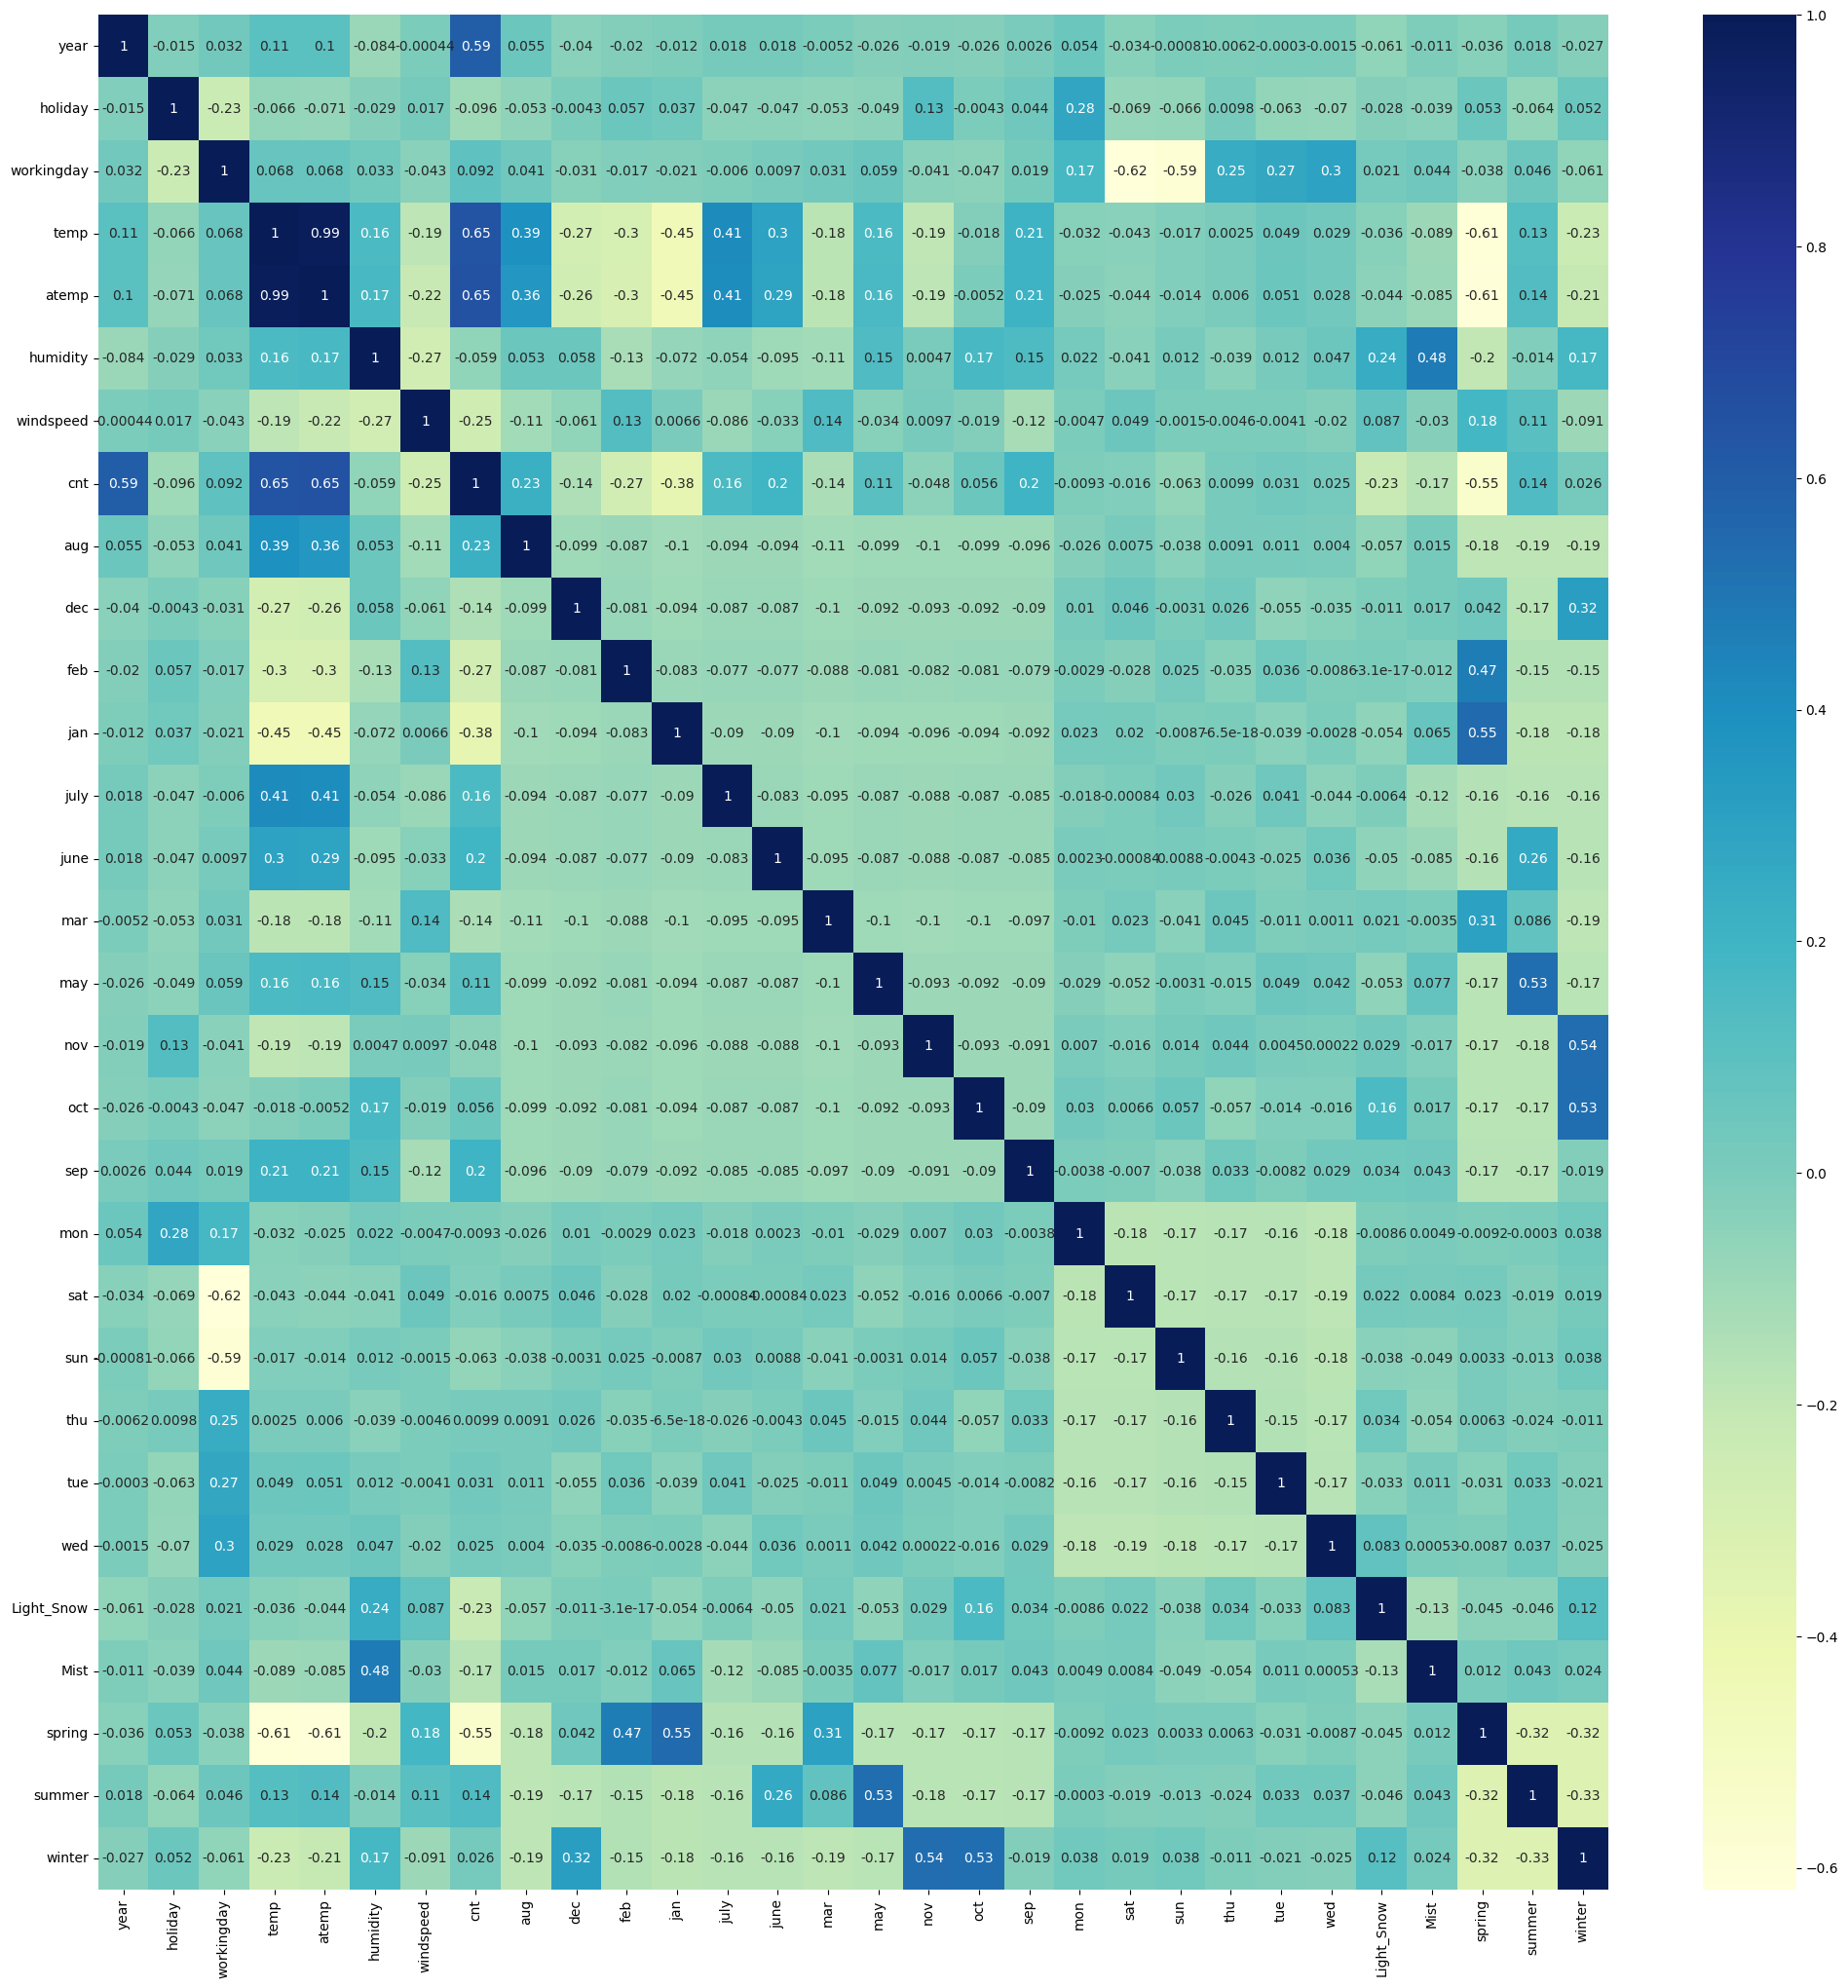

In [656]:
# checking the correlation coefficients
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

Working day also has highest correlation with cnt

In [657]:
# Building the model
y_train = df_train.pop('cnt')
X_train = df_train

In [658]:
# Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [659]:
# list of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [660]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_Snow', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

In [661]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [662]:
# calculating VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [663]:
X_train_rfe = X_train[col]

In [664]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Mist,1.57


### step 5. Building a linear model

In [665]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        00:50:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.000       0.145       0.254
year           0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday     0.0837      0.010      8.665      0.000       0.065       0.103
temp           0.5277      0.033     15.884      0.000       0.462       0.593
humidity      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
july          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep            0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0937      0.012      8.040      0.000       0.071       0.117
sun            0.0406      0.012      3.315      0.001       0.017       0.065
Light_Snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [666]:
# As 'workingday' shows highest VIF, let us remove it
X_train_new = X_train_rfe.drop(['workingday'], axis=1)
# calculating VIF
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Mist,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [667]:
# Building 2nd Linear Regression model
X_train_sm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_sm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        00:50:32   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2832      0.034      8.300      0.000       0.216       0.350
year           0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp           0.5277      0.033     15.884      0.000       0.462       0.593
humidity      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
july          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep            0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0100      0.011      0.897      0.370      -0.012       0.032
sun           -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light_Snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [668]:
# removing 'sat' as it has high p-value
X_train_new = X_train_new.drop(['sat'],axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Mist,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [669]:
X_train_new = X_train_new.drop(['humidity'],axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Mist,1.56
5,sep,1.34
6,sun,1.18


In [670]:
# Building 3rd Linear Regression model
X_train_sm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_sm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.45e-189
Time:                        00:50:32   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.000       0.149       0.263
year           0.2335      0.008     28.807      0.000       0.218       0.249
holiday       -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp           0.4907      0.033     15.004      0.000       0.426       0.555
windspeed     -0.1479      0.025     -5.981      0.000      -0.196      -0.099
july          -0.0492      0.018     -2.680      0.008      -0.085      -0.013
sep            0.0760      0.017      4.541      0.000       0.043       0.109
sun           -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light_Snow    -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist          -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0475      0.015      3.171      0.002       0.018       0.077
winter         0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [671]:
# removing 'july' as it has high p-value
X_train_new = X_train_new.drop(['july'],axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Mist,1.55
4,sep,1.23
5,sun,1.18
6,Light_Snow,1.08


In [672]:
# Building 4th Linear Regression model
X_train_sm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_sm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          3.23e-189
Time:                        00:50:32   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1981      0.029      6.794      0.000       0.141       0.255
year           0.2340      0.008     28.703      0.000       0.218       0.250
holiday       -0.1043      0.026     -4.029      0.000      -0.155      -0.053
temp           0.4782      0.033     14.682      0.000       0.414       0.542
windspeed     -0.1480      0.025     -5.951      0.000      -0.197      -0.099
sep            0.0894      0.016      5.557      0.000       0.058       0.121
sun           -0.0495      0.012     -4.265      0.000      -0.072      -0.027
Light_Snow    -0.2904      0.025    -11.843      0.000      -0.339      -0.242
Mist          -0.0809      0.009     -9.324      0.000      -0.098      -0.064
spring        -0.0544      0.021     -2.649      0.008      -0.095      -0.014
summer         0.0623      0.014      4.439      0.000       0.035       0.090
winter         0.0969      0.017      5.870      0.000       0.064       0.129
==============================================================================
Omnibus:                       67.238   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.903
Skew:                          -0.684   Prob(JB):                     2.56e-36
Kurtosis:                       5.417   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can consider the above model

In [673]:
lr_4.params

const         0.198086
year          0.234000
holiday      -0.104300
temp          0.478161
windspeed    -0.148022
sep           0.089359
sun          -0.049479
Light_Snow   -0.290403
Mist         -0.080899
spring       -0.054372
summer        0.062284
winter        0.096907
dtype: float64

### step 6 : Residual Analysis of the train data and validation

In [674]:
X_train_sm_4

,const,year,holiday,temp,windspeed,sep,sun,Light_Snow,Mist,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,0,1,0


In [675]:
y_train_pred = lr_4.predict(X_train_sm_4)

#### Normality of error terms

Text(0.5, 0, 'Errors')

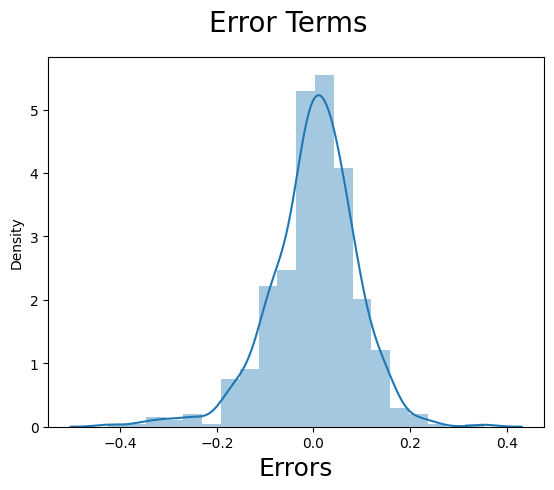

In [676]:

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)


The distribution should be centered to 0 and normal

#### Multi colinearity

In [677]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Mist,1.55
4,sep,1.23
5,sun,1.18
6,Light_Snow,1.08


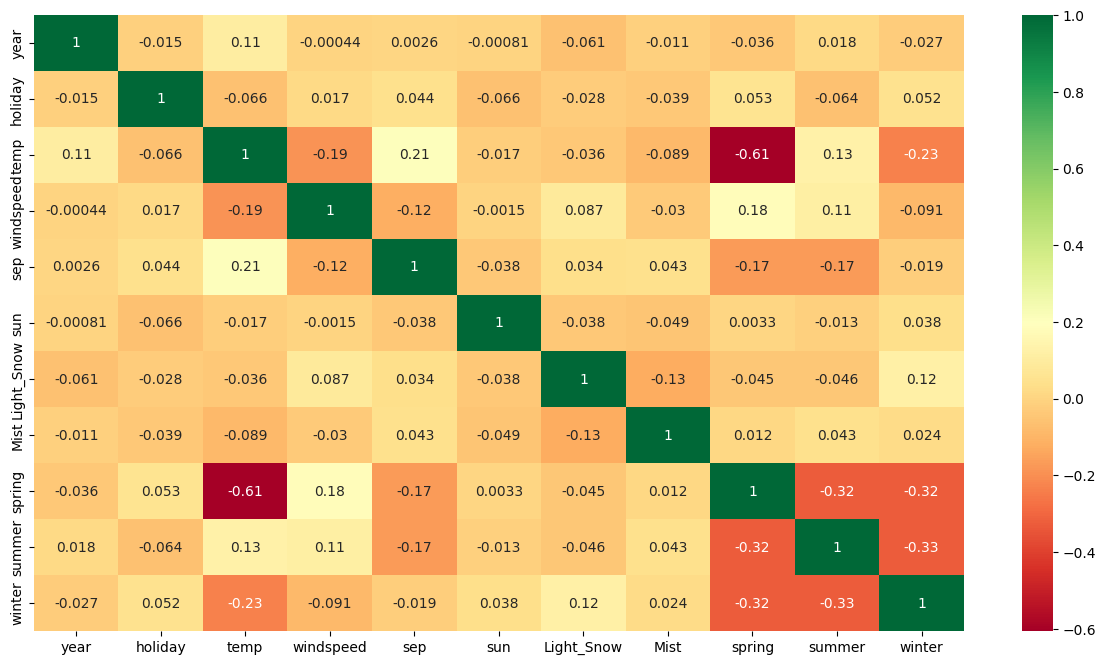

In [678]:
# heat map
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

There is no multicolineariry as seen from the heatmap

### step-7 Making Predictions Using the Final model

Now that we have fitted the model and checked the normality of error terms, it's time to  make predictions using the final, i.e. 6th model.

In [679]:
# applying scaling on test dataset
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [680]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Snow,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [681]:
y_test = df_test.pop('cnt')
X_test = df_test

In [682]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_sm_4 = sm.add_constant(X_test)
y_pred = lr_4.predict(X_test_sm_4)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

### step 8. Model Evaluation

Text(0, 0.5, 'y_pred')

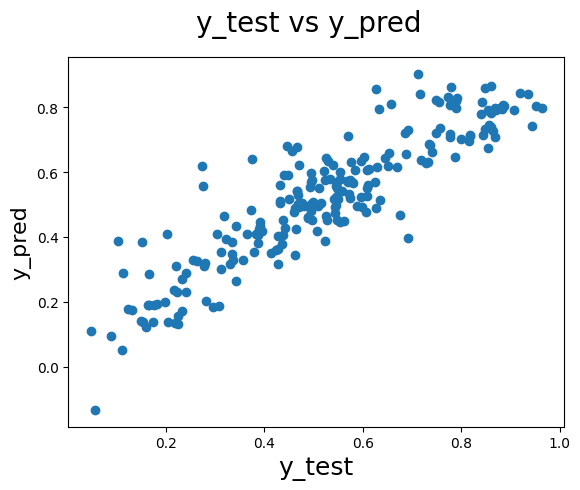

In [683]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [684]:
round(lr_4.params, 4)

const         0.1981
year          0.2340
holiday      -0.1043
temp          0.4782
windspeed    -0.1480
sep           0.0894
sun          -0.0495
Light_Snow   -0.2904
Mist         -0.0809
spring       -0.0544
summer        0.0623
winter        0.0969
dtype: float64

The equation will be

cnt = 0.1981+0.2340 x year -0.1043 x holiday +0.4782 x temp -0.1480 x windspeed +0.0894 x sep -0.0495 x sun -0.2904 x Light_Snow -0.0809 x Mist
-0.0544 x spring +0.0623 x summer +0.0969 x winter

In [685]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


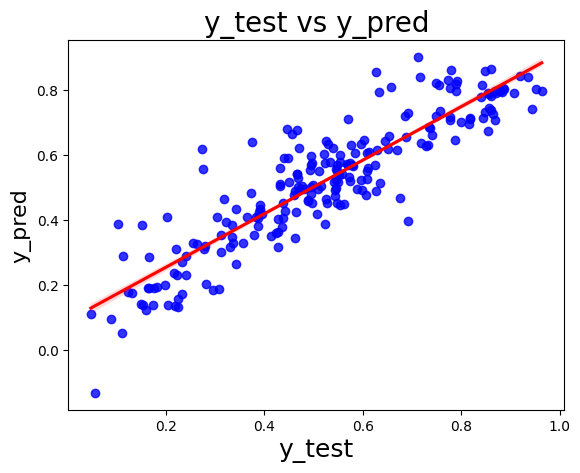

In [686]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### comparison between Training and Testing dataset

Train dataset R^2 = 0.839

Test datset R^2 = 0.8066

Train dataset adjusted R^2 = 0.835

Test dataset adjusted R^2 = 0.7963

### Demand of Bikes depend on 'year', 'holiday', 'temp', 'windspeed', 'sep', 'sun', 'Light_Snow', 'Mist', 'spring', 'summer', 'winter'